1)The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.
Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.
Attribute Information:
The explanations of sensor measurements and their brief statistics are given below.
Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/content/gas_turbines.csv")

In [3]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
data.shape

(15039, 11)

In [7]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [11]:
len(data['TEY'].unique())

4207

In [12]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [13]:
data.info

<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583

In [14]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


**Plots and Visualizations**

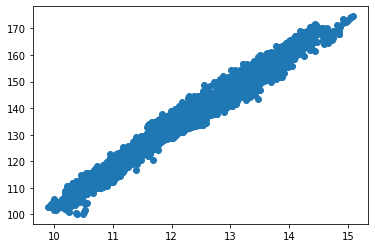

In [15]:
plt.scatter(x="CDP",y="TEY",data=data) #which is linerly co-related

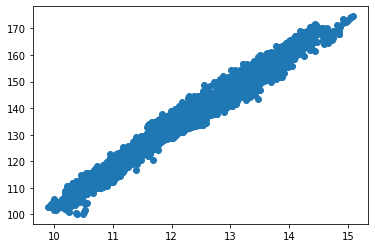

In [16]:
plt.scatter(x="CDP",y="TEY",data=data)#which is linerly co-related

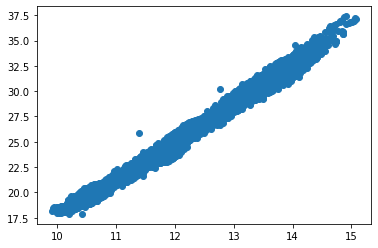

In [17]:
plt.scatter(x="CDP",y="GTEP",data=data)#which is linerly co-related

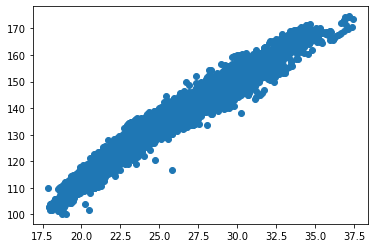

In [18]:
plt.scatter(x="GTEP",y="TEY",data=data)#which is linerly co-related

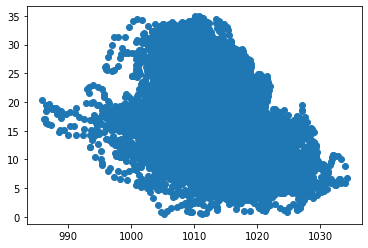

In [19]:
plt.scatter(x="AP",y="AT",data=data)# negtively corelated

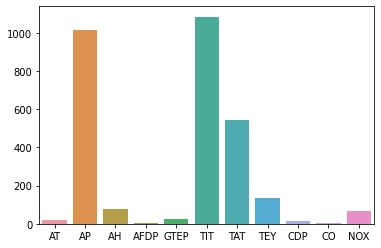

In [20]:
sns.barplot(data=data)

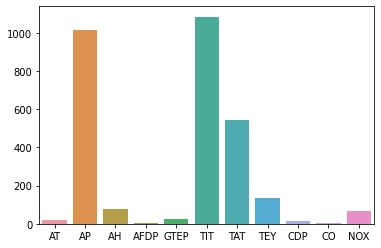

In [21]:
sns.barplot(data=data)

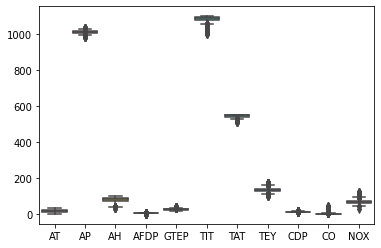

In [22]:
sns.boxplot(data=data)

(array([[7., 1., 0., ..., 0., 0., 2.],
        [7., 1., 0., ..., 0., 0., 2.],
        [7., 1., 0., ..., 0., 0., 2.],
        ...,
        [7., 1., 0., ..., 0., 0., 2.],
        [7., 1., 0., ..., 0., 0., 2.],
        [7., 1., 0., ..., 0., 0., 2.]]),
 array([3.87510000e-04, 1.10080349e+02, 2.20160310e+02, 3.30240271e+02,
        4.40320233e+02, 5.50400194e+02, 6.60480155e+02, 7.70560116e+02,
        8.80640078e+02, 9.90720039e+02, 1.10080000e+03]),
 <a list of 15039 Lists of Patches objects>)

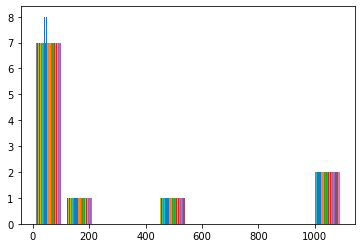

In [23]:
plt.hist(data)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <a list of 10 Patch objects>)

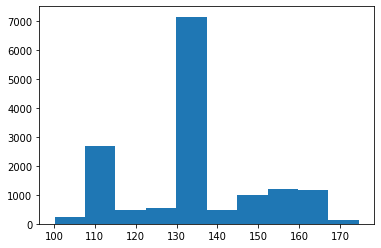

In [24]:
plt.hist(data['TEY'])

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <a list of 10 Patch objects>)

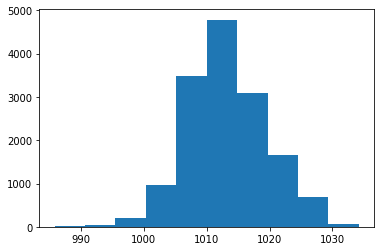

In [25]:
plt.hist(data['AP'])

(array([5.000e+00, 1.000e+00, 5.000e+01, 1.630e+02, 3.690e+02, 2.064e+03,
        6.780e+02, 4.960e+02, 4.906e+03, 6.307e+03]),
 array([1000.8, 1010.8, 1020.8, 1030.8, 1040.8, 1050.8, 1060.8, 1070.8,
        1080.8, 1090.8, 1100.8]),
 <a list of 10 Patch objects>)

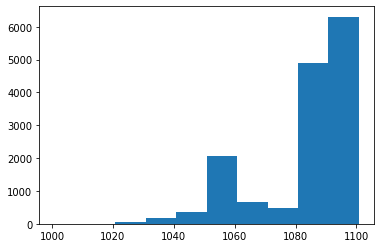

In [26]:
plt.hist(data['TIT'])

(array([   14.,    39.,    85.,   556.,   954.,   776.,   776.,   688.,
          525., 10626.]),
 array([512.45 , 516.266, 520.082, 523.898, 527.714, 531.53 , 535.346,
        539.162, 542.978, 546.794, 550.61 ]),
 <a list of 10 Patch objects>)

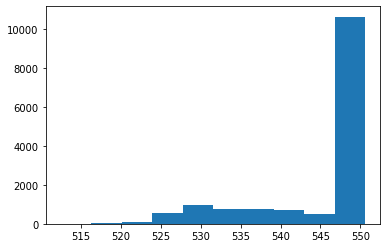

In [27]:
plt.hist(data['TAT'])

In [28]:
features = data.columns.tolist()
features.remove('TEY')
features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']

In [29]:
X=data.drop(columns =['TEY'])
y=data['TEY']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [33]:
n_features =X.shape[1]
n_features

10

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow
import tensorflow as tf
from tensorflow import keras

In [35]:
optmizer =RMSprop(0.03)#0.01 is a learning rate
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [36]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=5, batch_size=30, verbose = 1)

Epoch 1/5
351/351 [==============================] - 1s 2ms/step - loss: 2815.8540 - accuracy: 0.0000e+00
Epoch 2/5
351/351 [==============================] - 1s 1ms/step - loss: 2687.7161 - accuracy: 0.0000e+00
Epoch 3/5
351/351 [==============================] - 1s 1ms/step - loss: 2660.1145 - accuracy: 0.0000e+00
Epoch 4/5
351/351 [==============================] - 1s 1ms/step - loss: 2636.7500 - accuracy: 0.0000e+00
Epoch 5/5
351/351 [==============================] - 0s 1ms/step - loss: 2619.2815 - accuracy: 0.0000e+00


In [37]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 2497.3396 - accuracy: 0.0000e+00


[2497.339599609375, 0.0]

In [38]:
optmizer =RMSprop(0.5)#0.01 is a learning rate
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [39]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 2s 1ms/step - loss: 73332.4922 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 1s 1ms/step - loss: 16027.6201 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 1s 1ms/step - loss: 16027.6484 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 1s 1ms/step - loss: 16027.6338 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6094 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6621 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.5820 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6562 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 1s 1ms/step - loss: 16027.6348 - accuracy: 0.0000e+00
Epoch 10/1

In [40]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 15956.8740 - accuracy: 0.0000e+00


[15956.8740234375, 0.0]